COPPER WAVEGUIDE COMPLETE ANALYSIS
ANALYSIS OBJECTIVES:
1. Geometry visualization of Cu waveguides W1, W2, W3
2. Three-layer structure: Cu waveguides → SiO₂ → Poly Si → Si substrate
3. Conductivity analysis in Poly-Si region
4. S-parameter optimization
5. Thickness optimization (0.1-3.0 um)
6. Voltage and frequency dependence

1. GEOMETRY VISUALIZATION


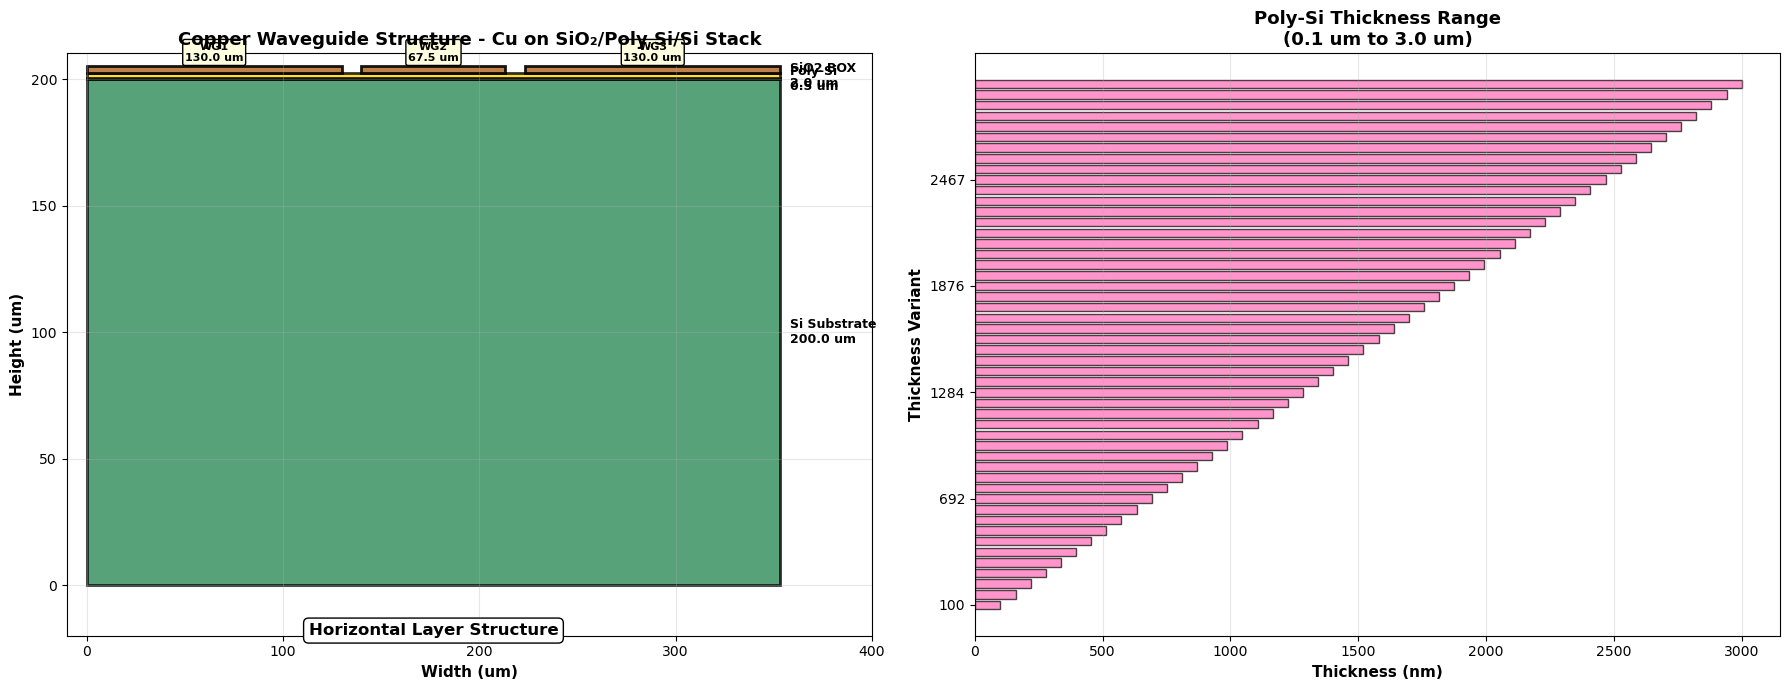

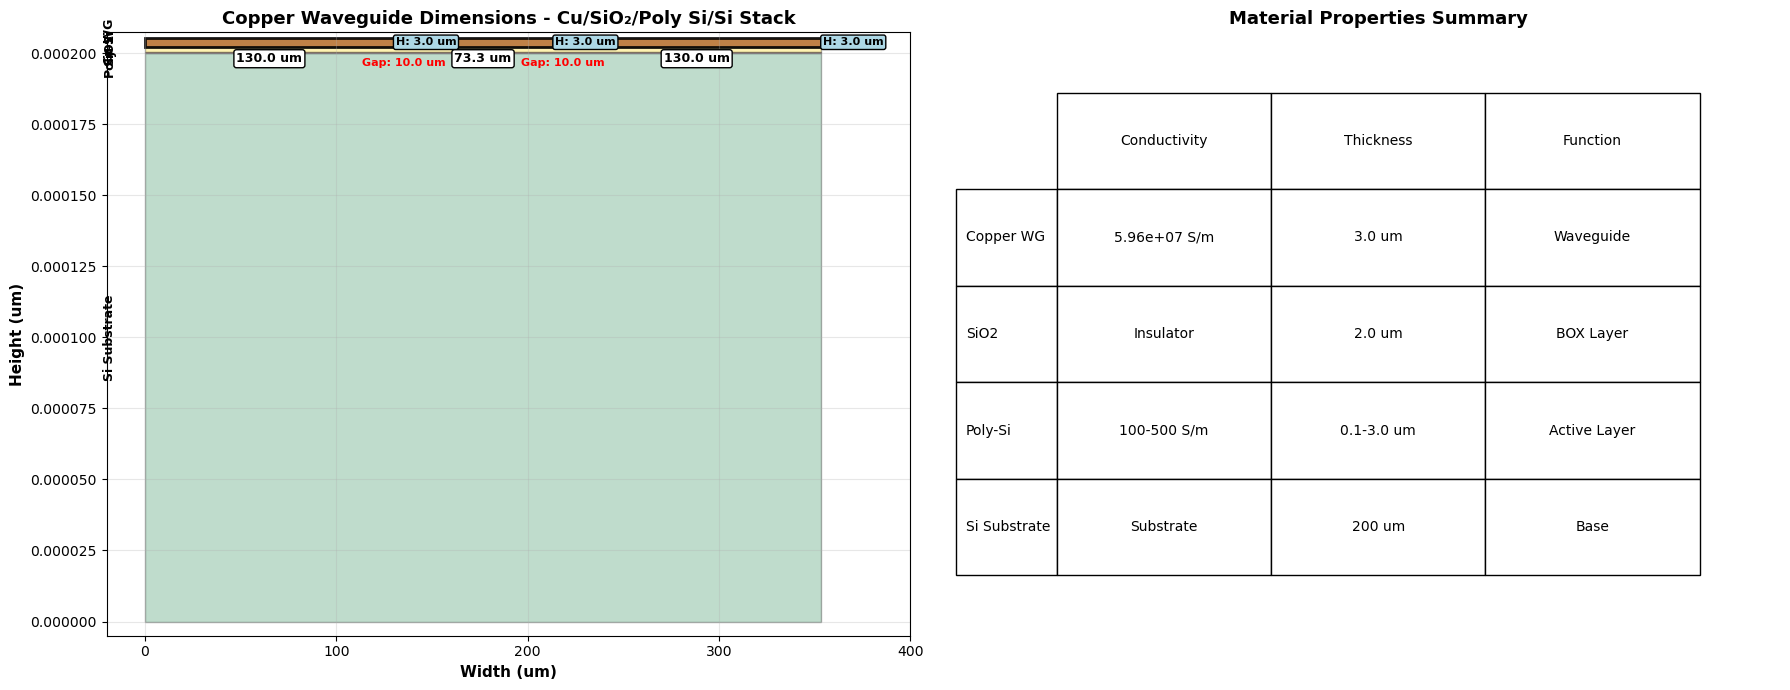


2. CONDUCTIVITY ANALYSIS


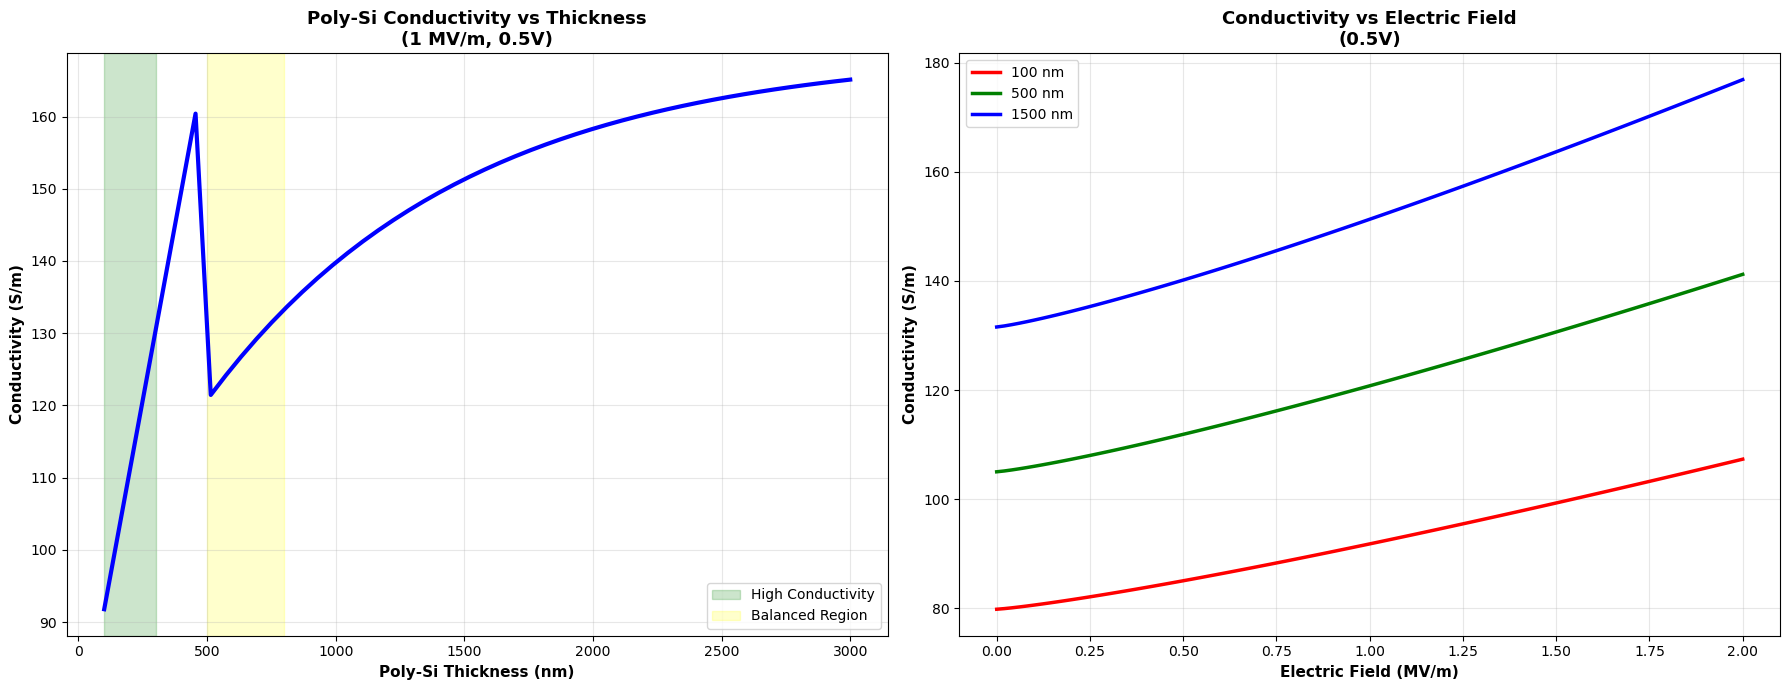


3. S-PARAMETERS ANALYSIS


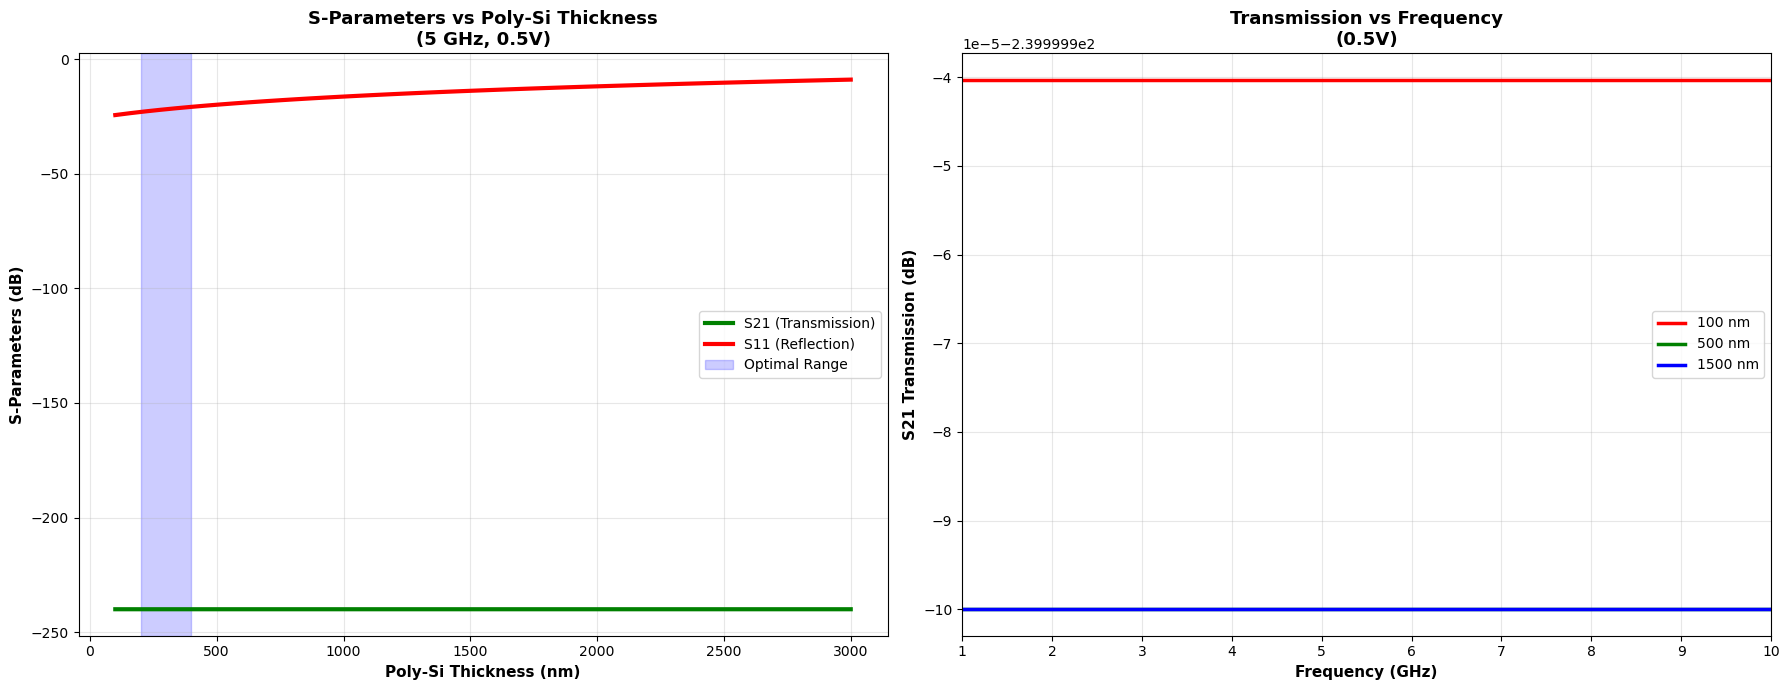


4. VOLTAGE DEPENDENCE


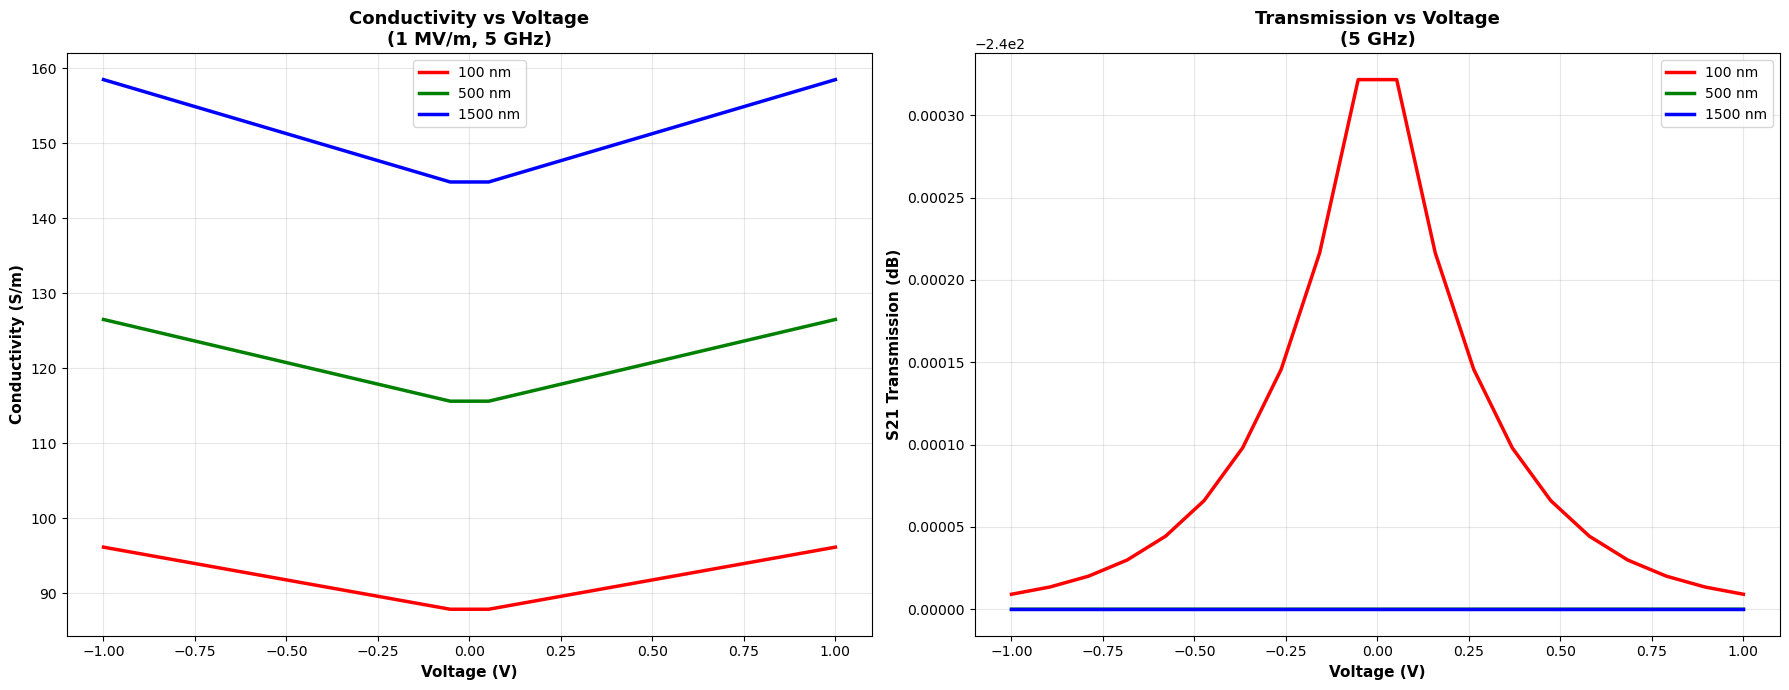


5. OPTIMIZATION RESULTS


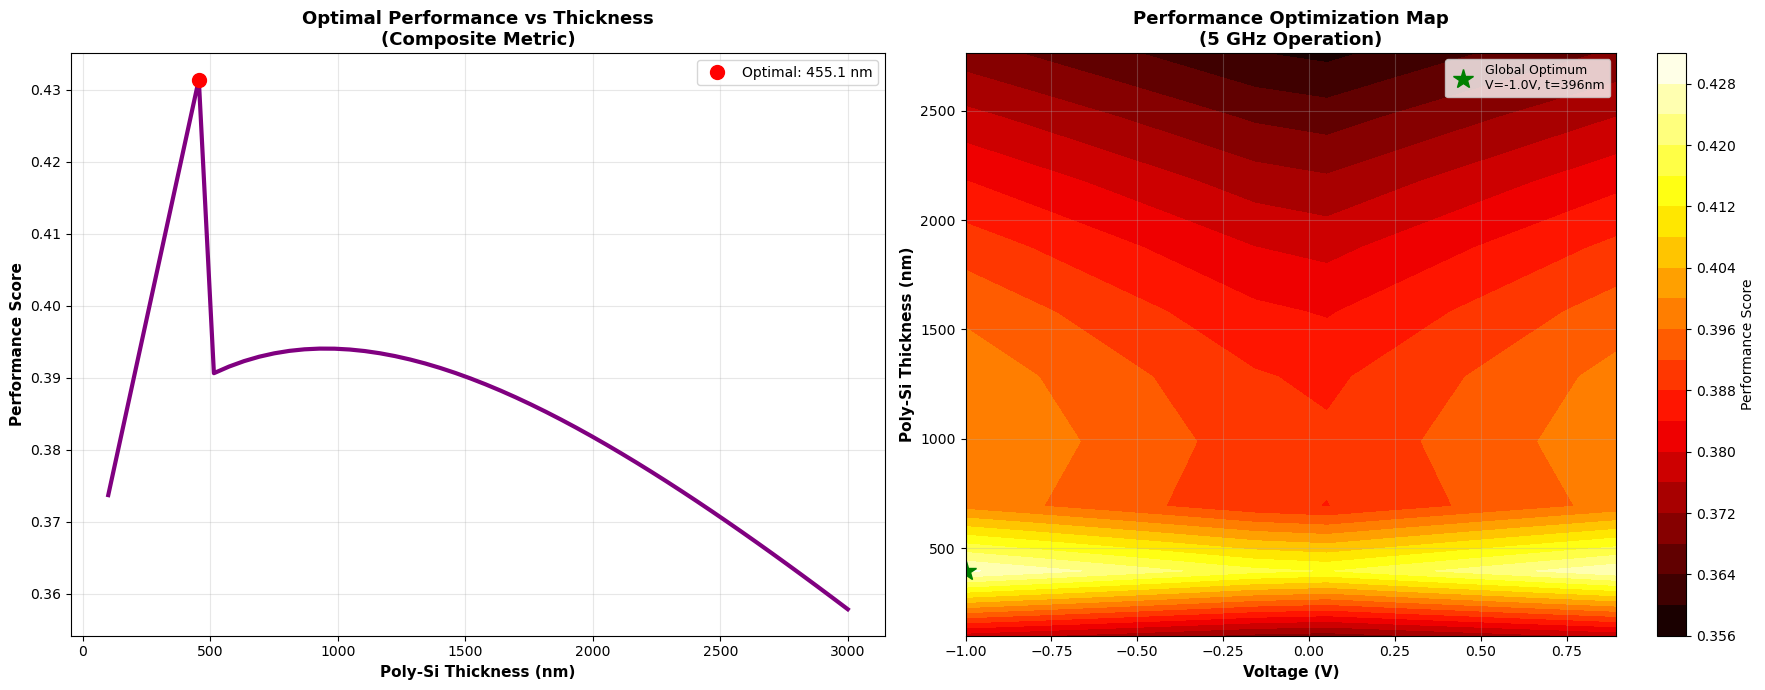


FINAL RESULTS SUMMARY
Recommended Poly-Si Thickness: 455.1 nm
S21 Transmission: -240.00 dB
S11 Reflection: -20.30 dB
Poly-Si Conductivity: 160.4 S/m


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class CopperWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7
        self.rho_cu = 1.68e-8
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        
        # Copper Waveguide dimensions (meters)
        self.W1 = 130e-6
        self.W2_range = np.linspace(15e-6, 120e-6, 10)
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # Layer thicknesses - CORRECTED ORDER: Cu waveguides on SiO2 (first), then Si-Poly, then Si (bottom)
        self.t_box = 2e-6
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 50)
        self.t_si = 200e-6
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)
        self.voltage_range = np.linspace(-1, 1, 20)

    def plot_geometry_1(self):
        """Plot 1: Complete waveguide structure overview"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Color scheme
        colors = {
            'si': '#2E8B57',
            'sio2': '#FFD700', 
            'polysi': '#FF69B4',
            'cu_wg': '#B87333'
        }
        
        W2 = self.W2_range[5]
        total_width = self.W1 + self.gap + W2 + self.gap + self.W3
        
        # CORRECTED LAYER ORDER: Cu waveguides on SiO2 (first), then Si-Poly, then Si (bottom)
        # Calculate heights for proper stacking
        cu_wg_height = self.t_si + self.t_polysi_range[3] + self.t_box  # Cu waveguides on top
        sio2_height = self.t_si + self.t_polysi_range[3]  # SiO2 under Cu
        polysi_height = self.t_si  # Poly Si under SiO2
        si_height = 0  # Si substrate at bottom
        
        # Plot 1: Main structure - CORRECTED ORDER
        # Draw substrate layers in correct order from bottom to top
        layers = [
            (si_height, self.t_si, colors['si'], 'Si Substrate', '200.0 um'),
            (polysi_height, self.t_polysi_range[3], colors['polysi'], 'Poly-Si Layer', '0.5 um'),
            (sio2_height, self.t_box, colors['sio2'], 'SiO2 BOX', '2.0 um')
        ]
        
        for y_start, thickness, color, name, dim in layers:
            rect = patches.Rectangle((0, y_start), total_width, thickness,
                                   facecolor=color, alpha=0.8, edgecolor='black', linewidth=2)
            ax1.add_patch(rect)
            
        # Draw copper waveguides (top layer)
        wg_positions = [
            (0, self.W1, 'WG1', '130.0 um'),
            (self.W1 + self.gap, W2, 'WG2', '67.5 um'),
            (self.W1 + self.gap + W2 + self.gap, self.W3, 'WG3', '130.0 um')
        ]
        
        for x_start, width, label, dim in wg_positions:
            rect = patches.Rectangle((x_start, cu_wg_height), width, self.H,
                                   facecolor=colors['cu_wg'], alpha=0.9, edgecolor='black', linewidth=2)
            ax1.add_patch(rect)
        
        # Add labels with proper spacing to avoid overlap
        ax1.text(total_width/2, -15e-6, 'Horizontal Layer Structure', 
                ha='center', va='top', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
        
        # Layer labels on right side - CORRECTED ORDER
        label_x = total_width + 5e-6
        ax1.text(label_x, si_height + self.t_si/2, 'Si Substrate\n200.0 um', 
                ha='left', va='center', fontweight='bold', fontsize=9)
        ax1.text(label_x, polysi_height + self.t_polysi_range[3]/2, 'Poly-Si\n0.5 um', 
                ha='left', va='center', fontweight='bold', fontsize=9)
        ax1.text(label_x, sio2_height + self.t_box/2, 'SiO2 BOX\n2.0 um', 
                ha='left', va='center', fontweight='bold', fontsize=9)
        
        # Waveguide labels above with proper vertical spacing
        for x_start, width, label, dim in wg_positions:
            ax1.text(x_start + width/2, cu_wg_height + self.H + 1e-6, f'{label}\n{dim}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow"))
        
        ax1.set_xlabel('Width (um)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Height (um)', fontweight='bold', fontsize=11)
        ax1.set_title('Copper Waveguide Structure - Cu on SiO₂/Poly Si/Si Stack', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        total_height = cu_wg_height + self.H
        ax1.set_xlim(-10e-6, total_width + 25e-6)
        ax1.set_ylim(-20e-6, total_height + 5e-6)
        
        ax1.set_xticks(np.arange(0, total_width + 50e-6, 100e-6))
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in np.arange(0, total_width + 50e-6, 100e-6)])
        ax1.set_yticks(np.arange(0, total_height + 20e-6, 50e-6))
        ax1.set_yticklabels([f'{y*1e6:.0f}' for y in np.arange(0, total_height + 20e-6, 50e-6)])
        
        # Plot 2: Layer thickness range
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        ax2.barh(range(len(thickness_nm)), thickness_nm, 
                color=colors['polysi'], alpha=0.7, edgecolor='black')
        ax2.set_yticks(range(0, len(thickness_nm), 10))
        ax2.set_yticklabels([f'{thickness_nm[i]:.0f}' for i in range(0, len(thickness_nm), 10)])
        ax2.set_xlabel('Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Thickness Variant', fontweight='bold', fontsize=11)
        ax2.set_title('Poly-Si Thickness Range\n(0.1 um to 3.0 um)', 
                     fontweight='bold', fontsize=13)
        ax2.grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()

    def plot_geometry_2(self):
        """Plot 2: Detailed waveguide specifications"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        colors = {'cu_wg': '#B87333', 'polysi': '#FF69B4', 'sio2': '#FFD700', 'si': '#2E8B57'}
        W2 = self.W2_range[5]
        
        # Plot 1: Waveguide dimensions - CORRECTED LAYER ORDER
        total_width = self.W1 + self.gap + W2 + self.gap + self.W3
        
        # CORRECTED: Cu waveguides on SiO2 (first), then Si-Poly, then Si (bottom)
        cu_wg_base = self.t_si + self.t_polysi_range[3] + self.t_box
        sio2_base = self.t_si + self.t_polysi_range[3]
        polysi_base = self.t_si
        
        # Draw layers in correct order from bottom to top
        # Si substrate (bottom)
        si_rect = patches.Rectangle((0, 0), total_width, self.t_si,
                                  facecolor=colors['si'], alpha=0.3, edgecolor='black')
        ax1.add_patch(si_rect)
        
        # Poly-Si layer (middle)
        poly_rect = patches.Rectangle((0, polysi_base), total_width, self.t_polysi_range[3],
                                    facecolor=colors['polysi'], alpha=0.3, edgecolor='black')
        ax1.add_patch(poly_rect)
        
        # SiO2 layer (top under Cu)
        sio2_rect = patches.Rectangle((0, sio2_base), total_width, self.t_box,
                                     facecolor=colors['sio2'], alpha=0.3, edgecolor='black')
        ax1.add_patch(sio2_rect)
        
        # Draw copper waveguides with dimensions (top layer)
        wg_data = [
            (0, self.W1, 'WG1'), 
            (self.W1 + self.gap, W2, 'WG2'),
            (self.W1 + self.gap + W2 + self.gap, self.W3, 'WG3')
        ]
        
        for x_start, width, label in wg_data:
            wg_rect = patches.Rectangle((x_start, cu_wg_base), width, self.H,
                                      facecolor=colors['cu_wg'], alpha=0.9, edgecolor='black', linewidth=2)
            ax1.add_patch(wg_rect)
            
            # Dimension labels - positioned to avoid overlap
            ax1.text(x_start + width/2, cu_wg_base - 2e-6, f'{width*1e6:.1f} um',
                   ha='center', va='top', fontweight='bold', fontsize=9,
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="white"))
            
            # Height labels - positioned to avoid overlap
            ax1.text(x_start + width + 1e-6, cu_wg_base + self.H/2, f'H: {self.H*1e6:.1f} um',
                   ha='left', va='center', fontweight='bold', fontsize=8,
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue"))
        
        # Gap annotations - positioned to avoid overlap
        ax1.text(self.W1 + self.gap/2, cu_wg_base - 4e-6, f'Gap: {self.gap*1e6:.1f} um',
                ha='center', va='top', fontweight='bold', fontsize=8, color='red')
        ax1.text(self.W1 + self.gap + W2 + self.gap/2, cu_wg_base - 4e-6, f'Gap: {self.gap*1e6:.1f} um',
                ha='center', va='top', fontweight='bold', fontsize=8, color='red')
        
        # Layer labels on left side - CORRECTED ORDER
        label_x = -15e-6
        ax1.text(label_x, self.t_si/2, 'Si Substrate', 
                ha='right', va='center', fontweight='bold', fontsize=9, rotation=90)
        ax1.text(label_x, polysi_base + self.t_polysi_range[3]/2, 'Poly-Si', 
                ha='right', va='center', fontweight='bold', fontsize=9, rotation=90)
        ax1.text(label_x, sio2_base + self.t_box/2, 'SiO2', 
                ha='right', va='center', fontweight='bold', fontsize=9, rotation=90)
        ax1.text(label_x, cu_wg_base + self.H/2, 'Cu WG', 
                ha='right', va='center', fontweight='bold', fontsize=9, rotation=90)
        
        ax1.set_xlabel('Width (um)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Height (um)', fontweight='bold', fontsize=11)
        ax1.set_title('Copper Waveguide Dimensions - Cu/SiO₂/Poly Si/Si Stack', fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        total_height = cu_wg_base + self.H
        ax1.set_xlim(-20e-6, total_width + 10e-6)
        ax1.set_ylim(-5e-6, total_height + 2e-6)
        
        ax1.set_xticks(np.arange(0, total_width + 50e-6, 100e-6))
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in np.arange(0, total_width + 50e-6, 100e-6)])
        
        # Plot 2: Material properties summary
        materials = ['Copper WG', 'SiO2', 'Poly-Si', 'Si Substrate']
        properties = ['Conductivity', 'Thickness', 'Function']
        values = [
            [f'{self.sigma_cu:.2e} S/m', f'{self.H*1e6:.1f} um', 'Waveguide'],
            ['Insulator', f'{self.t_box*1e6:.1f} um', 'BOX Layer'],
            ['100-500 S/m', '0.1-3.0 um', 'Active Layer'], 
            ['Substrate', f'{self.t_si*1e6:.0f} um', 'Base']
        ]
        
        ax2.axis('off')
        ax2.set_title('Material Properties Summary', fontweight='bold', fontsize=13)
        
        # Create table
        table = ax2.table(cellText=values,
                         rowLabels=materials,
                         colLabels=properties,
                         cellLoc='center',
                         loc='center',
                         bbox=[0.1, 0.1, 0.8, 0.8])
        
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.8)
        
        plt.tight_layout()
        plt.show()

    def polysi_conductivity(self, E_field, t_polysi, voltage):
        """Conductivity model for Poly-Si"""
        sigma_0 = 100
        
        # Field enhancement
        E_eff = np.abs(E_field) + 1e3
        field_factor = 1 + 0.15 * (E_eff/1e6)**1.2
        
        # Thickness effects
        if t_polysi < 0.5e-6:
            thickness_factor = 0.6 + 0.8 * (t_polysi/0.5e-6)
        else:
            thickness_factor = 1.0 + 0.4 * (1 - np.exp(-(t_polysi-0.5e-6)/1e-6))
        
        # Voltage effect
        voltage_factor = 1 + 0.1 * abs(voltage)
        
        return sigma_0 * field_factor * thickness_factor * voltage_factor

    def s_parameters_model(self, freq, t_polysi, voltage):
        """S-parameters model"""
        wavelength = self.c / freq
        beta = 2 * np.pi * self.n_polysi / wavelength
        
        # Loss calculation
        conductivity = self.polysi_conductivity(1e6, t_polysi, voltage)
        tan_delta = conductivity / (2 * np.pi * freq * self.epsilon_0 * self.n_polysi**2)
        alpha_diel = 8.686 * (2 * np.pi * freq / self.c) * self.n_polysi * tan_delta
        
        # Additional thickness-dependent loss
        if t_polysi < 0.3e-6:
            scatter_loss = 0.5 * (0.3e-6/t_polysi)
        else:
            scatter_loss = 0.1
            
        total_loss = alpha_diel + scatter_loss
        alpha_total = total_loss / 8.686
        
        # S-parameters
        S21 = np.exp(-alpha_total * self.L)
        S11 = 0.05 + 0.1 * (t_polysi/1e-6) * (1 + 0.05 * abs(voltage))
        
        return np.abs(S11), np.abs(S21), conductivity

    def plot_conductivity_analysis(self):
        """Plot 3: Conductivity analysis in Poly-Si"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_voltage = 0.5
        fixed_E = 1e6
        
        conductivity_values = []
        for t_polysi in self.t_polysi_range:
            conductivity = self.polysi_conductivity(fixed_E, t_polysi, fixed_voltage)
            conductivity_values.append(conductivity)
        
        ax1.plot(thickness_nm, conductivity_values, 'b-', linewidth=3)
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly-Si Conductivity vs Thickness\n(1 MV/m, 0.5V)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal regions
        ax1.axvspan(100, 300, alpha=0.2, color='green', label='High Conductivity')
        ax1.axvspan(500, 800, alpha=0.2, color='yellow', label='Balanced Region')
        ax1.legend(fontsize=10)
        
        # Plot 2: Conductivity vs Electric Field
        E_range = np.linspace(0, 2e6, 100)
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6]
        colors = ['red', 'green', 'blue']
        labels = ['100 nm', '500 nm', '1500 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_E = []
            for E in E_range:
                conductivity = self.polysi_conductivity(E, t_polysi, fixed_voltage)
                conductivity_E.append(conductivity)
            
            ax2.plot(E_range/1e6, conductivity_E, color=colors[i], 
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Electric Field (MV/m)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax2.set_title('Conductivity vs Electric Field\n(0.5V)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_sparameters_analysis(self):
        """Plot 4: S-parameters analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: S-parameters vs Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        S11_values = []
        S21_values = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21, _ = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            S11_values.append(20 * np.log10(S11 + 1e-12))
            S21_values.append(20 * np.log10(S21 + 1e-12))
        
        ax1.plot(thickness_nm, S21_values, 'g-', linewidth=3, label='S21 (Transmission)')
        ax1.plot(thickness_nm, S11_values, 'r-', linewidth=3, label='S11 (Reflection)')
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax1.set_title('S-Parameters vs Poly-Si Thickness\n(5 GHz, 0.5V)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal thickness range
        ax1.axvspan(200, 400, alpha=0.2, color='blue', label='Optimal Range')
        ax1.legend(fontsize=10)
        
        # Plot 2: S-parameters vs Frequency
        frequencies_ghz = self.freq_range / 1e9
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6]
        colors = ['red', 'green', 'blue']
        labels = ['100 nm', '500 nm', '1500 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            S21_freq = []
            for freq in self.freq_range:
                _, S21, _ = self.s_parameters_model(freq, t_polysi, fixed_voltage)
                S21_freq.append(20 * np.log10(S21 + 1e-12))
            
            ax2.plot(frequencies_ghz, S21_freq, color=colors[i], 
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S21 Transmission (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('Transmission vs Frequency\n(0.5V)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_voltage_analysis(self):
        """Plot 5: Voltage dependence analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Voltage
        fixed_E = 1e6
        fixed_freq = 5e9
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6]
        colors = ['red', 'green', 'blue']
        labels = ['100 nm', '500 nm', '1500 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_voltage = []
            for V in self.voltage_range:
                conductivity = self.polysi_conductivity(fixed_E, t_polysi, V)
                conductivity_voltage.append(conductivity)
            
            ax1.plot(self.voltage_range, conductivity_voltage, color=colors[i],
                    linewidth=2.5, label=labels[i])
        
        ax1.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Conductivity vs Voltage\n(1 MV/m, 5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: S21 vs Voltage
        for i, t_polysi in enumerate(thickness_cases):
            S21_voltage = []
            for V in self.voltage_range:
                _, S21, _ = self.s_parameters_model(fixed_freq, t_polysi, V)
                S21_voltage.append(20 * np.log10(S21 + 1e-12))
            
            ax2.plot(self.voltage_range, S21_voltage, color=colors[i],
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S21 Transmission (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('Transmission vs Voltage\n(5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_optimization_results(self):
        """Plot 6: Comprehensive optimization results"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Calculate performance metric
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        performance_scores = []
        for t_polysi in self.t_polysi_range:
            S11, S21, conductivity = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            
            # Performance metric: balance S21, S11, and conductivity
            S21_score = S21
            S11_score = 1 - S11
            conductivity_score = 1 - abs(conductivity - 200) / 200
            
            composite_score = 0.5 * S21_score + 0.3 * S11_score + 0.2 * conductivity_score
            performance_scores.append(composite_score)
        
        # Plot 1: Performance optimization
        ax1.plot(thickness_nm, performance_scores, 'purple', linewidth=3)
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Performance Score', fontweight='bold', fontsize=11)
        ax1.set_title('Optimal Performance vs Thickness\n(Composite Metric)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal point
        optimal_idx = np.argmax(performance_scores)
        optimal_thickness = thickness_nm[optimal_idx]
        optimal_score = performance_scores[optimal_idx]
        
        ax1.plot(optimal_thickness, optimal_score, 'ro', markersize=10,
                label=f'Optimal: {optimal_thickness:.1f} nm')
        ax1.legend(fontsize=10)
        
        # Plot 2: 2D optimization map
        thickness_nm_2d = [t * 1e9 for t in self.t_polysi_range[::5]]
        voltage_2d = self.voltage_range[::2]
        
        performance_map = np.zeros((len(thickness_nm_2d), len(voltage_2d)))
        
        for i, t_nm in enumerate(thickness_nm_2d):
            for j, V in enumerate(voltage_2d):
                t_polysi = t_nm * 1e-9
                S11, S21, conductivity = self.s_parameters_model(fixed_freq, t_polysi, V)
                
                S21_score = S21
                S11_score = 1 - S11
                conductivity_score = 1 - abs(conductivity - 200) / 200
                
                performance_map[i, j] = 0.5 * S21_score + 0.3 * S11_score + 0.2 * conductivity_score
        
        contour = ax2.contourf(voltage_2d, thickness_nm_2d, performance_map, levels=20, cmap='hot')
        plt.colorbar(contour, ax=ax2, label='Performance Score')
        
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Poly-Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_title('Performance Optimization Map\n(5 GHz Operation)', 
                     fontweight='bold', fontsize=13)
        ax2.grid(True, alpha=0.3)
        
        # Mark global optimum
        global_opt_idx = np.unravel_index(np.argmax(performance_map), performance_map.shape)
        optimal_V = voltage_2d[global_opt_idx[1]]
        optimal_t = thickness_nm_2d[global_opt_idx[0]]
        
        ax2.plot(optimal_V, optimal_t, 'g*', markersize=15,
                label=f'Global Optimum\nV={optimal_V:.1f}V, t={optimal_t:.0f}nm')
        ax2.legend(fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        return optimal_thickness

    def run_complete_analysis(self):
        """Run complete analysis"""
        print("COPPER WAVEGUIDE COMPLETE ANALYSIS")
        print("=" * 60)
        
        print("ANALYSIS OBJECTIVES:")
        print("1. Geometry visualization of Cu waveguides W1, W2, W3")
        print("2. Three-layer structure: Cu waveguides → SiO₂ → Poly Si → Si substrate") 
        print("3. Conductivity analysis in Poly-Si region")
        print("4. S-parameter optimization")
        print("5. Thickness optimization (0.1-3.0 um)")
        print("6. Voltage and frequency dependence")
        print("=" * 60)
        
        print("\n1. GEOMETRY VISUALIZATION")
        self.plot_geometry_1()
        self.plot_geometry_2()
        
        print("\n2. CONDUCTIVITY ANALYSIS")
        self.plot_conductivity_analysis()
        
        print("\n3. S-PARAMETERS ANALYSIS") 
        self.plot_sparameters_analysis()
        
        print("\n4. VOLTAGE DEPENDENCE")
        self.plot_voltage_analysis()
        
        print("\n5. OPTIMIZATION RESULTS")
        optimal_thickness = self.plot_optimization_results()
        
        print("\n" + "=" * 60)
        print("FINAL RESULTS SUMMARY")
        print("=" * 60)
        print(f"Recommended Poly-Si Thickness: {optimal_thickness:.1f} nm")
        
        # Calculate performance at optimal point
        optimal_t = optimal_thickness * 1e-9
        S11, S21, conductivity = self.s_parameters_model(5e9, optimal_t, 0.5)
        
        print(f"S21 Transmission: {20*np.log10(S21 + 1e-12):.2f} dB")
        print(f"S11 Reflection: {20*np.log10(S11 + 1e-12):.2f} dB") 
        print(f"Poly-Si Conductivity: {conductivity:.1f} S/m")
        print("=" * 60)

# Run analysis
if __name__ == "__main__":
    analyzer = CopperWaveguideAnalysis()
    analyzer.run_complete_analysis()